#Loksabha Election 2019 Data Analysis in India
The Lok Sabha, or House of the People, is the lower house of India’s bicameral Parliament, with the upper house being the Rajya Sabha. Members of the Lok Sabha are elected by an adult universal suffrage and a first-past-the-post system to represent their respective constituencies, and they hold their seats for five years or until the body is dissolved by the President on the advice of the council of ministers. The house meets in the Lok Sabha Chambers of the Sansad Bhavan, New Delhi.

<br><br>

The maximum membership of the House allotted by the Constitution of India is 552 (Initially, in 1950, it was 500). Currently, the house has 543 seats which are made up by the election of up to 543 elected members and at a maximum. Between 1952 and 2020, 2 additional members of the Anglo-Indian community were also nominated by the President of India on the advice of the Government of India, which was abolished in January 2020 by the 104th Constitutional Amendment Act, 2019. The Lok Sabha has a seating capacity of 550.

<br><br>

A total of 131 seats (24.03%) are reserved for representatives of Scheduled Castes (84) and Scheduled Tribes (47). The quorum for the House is 10% of the total membership. The Lok Sabha, unless sooner dissolved, continues to operate for five years for time being from the date appointed for its first meeting. However, while a proclamation of emergency is in operation, this period may be extended by Parliament by law or decree.

#Importing the Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Loading the Files

In [2]:
import io
df2 = pd.read_csv('LS_2.0.csv')

#Displaying the Data

In [3]:
df2.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [4]:
df2.rename(columns={'CRIMINAL\nCASES': 'criminal'}, inplace=True)

#Shape of the Dataset

In [5]:
df2.shape

(2263, 19)

#Information about all the collumns in the Dataset

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   criminal                                  2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

This Dataset is based on the Lok Sabha 2019 in India. There are a total of 2263 rows and 19 columns in this dataset. By using this dataset this data analysis project is created.

#Description of Dataset

In [7]:
df2.describe()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


#corelation between the Data

In [8]:
df2.corr()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
WINNER,1.000000,0.110294,0.725678,0.520286,0.726125,0.738976,0.757303,0.038107
AGE,0.110294,1.000000,0.208567,0.129360,0.208600,0.207304,0.223700,0.021083
GENERAL\nVOTES,0.725678,0.208567,1.000000,0.616742,0.999988,0.962219,0.962905,0.211092
POSTAL\nVOTES,0.520286,0.129360,0.616742,1.000000,0.620614,0.630882,0.634896,0.038453
TOTAL\nVOTES,0.726125,0.208600,0.999988,0.620614,1.000000,0.962441,0.963150,0.210515
OVER TOTAL ELECTORS \nIN CONSTITUENCY,0.738976,0.207304,0.962219,0.630882,0.962441,1.000000,0.977416,0.009227
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,0.757303,0.223700,0.962905,0.634896,0.963150,0.977416,1.000000,0.072228
TOTAL ELECTORS,0.038107,0.021083,0.211092,0.038453,0.210515,0.009227,0.072228,1.000000


#Checking the Null Value in the Dataset

In [9]:
df2.isnull().values.any()

True

#Crime count

Here we are counting the total crimes done by an MP in an individual states in India.

In [10]:
df2['criminal'].value_counts()

0                1242
1                 313
2                 119
3                 104
4                  64
5                  42
6                  26
Not Available      22
7                  18
8                  16
10                 11
9                  11
11                  5
14                  4
12                  4
13                  3
15                  2
24                  1
31                  1
22                  1
40                  1
42                  1
52                  1
28                  1
204                 1
18                  1
41                  1
240                 1
16                  1
Name: criminal, dtype: int64

In [11]:
df2['criminal'] = df2['criminal'].replace(['Not Available'],'0')
df2['criminal'] = pd.to_numeric(df2['criminal'] , errors='coerce')
df2['criminal'].value_counts()
df2['criminal'].isna()

0       False
1       False
2       False
3        True
4       False
        ...  
2258    False
2259    False
2260    False
2261    False
2262     True
Name: criminal, Length: 2263, dtype: bool

#Here we are removing the null values from the collumn criminal in the dataset.

In [12]:
df2['criminal'].isnull().sum().sum()

245

#Here we are displaying the data again.

In [13]:
df2.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,criminal,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.0,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


#Barplot of crime Count in different states
 Here we have created a barplot of crime count in different states in India.  

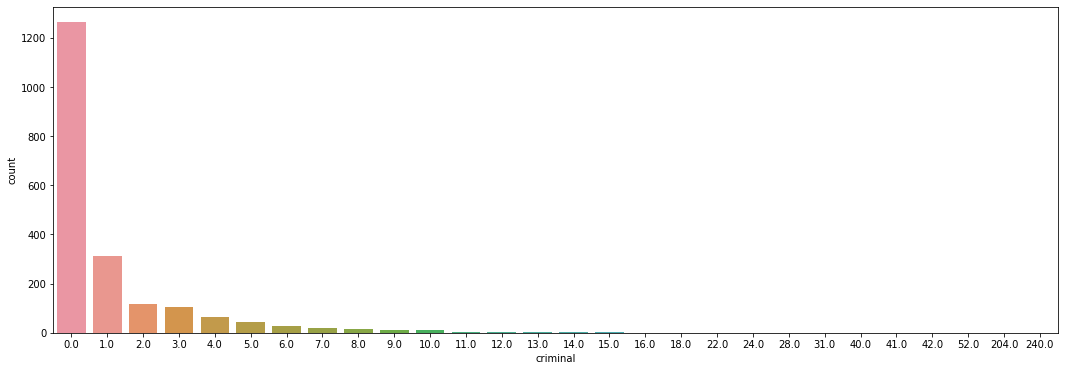

In [14]:
#Using Seaborn's CountPlot with figure size 10 * 6
plt.figure(figsize=(18,6))
sns.countplot(x='criminal',data=df2);

From the description given below, we can see that the mean of the crime among contestants is 1.45 where as the minimum crime,25% and 50% contestants did not make any crime but sadly in 75 % of total candidates the crime rate became 1.0. More surprisingly the maximum crime conceived by a person is 240,that's huge.

In [15]:
df2['criminal'].describe()

count    2018.000000
mean        1.453915
std         7.636973
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       240.000000
Name: criminal, dtype: float64

#Line Graph of State vs Criminal Case

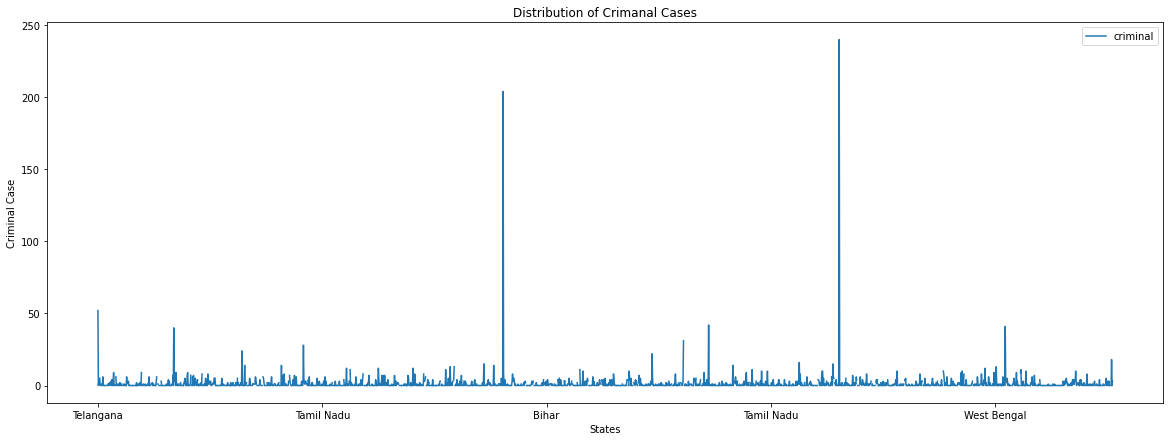

In [16]:
import matplotlib.pyplot as plt
#fig = plt.figure(figsize =(100, 7))
df2.plot(x="STATE", y=["criminal"],figsize =(20, 7), fontsize=10)
plt.xlabel("States")
plt.ylabel("Criminal Case")
plt.title("Distribution of Crimanal Cases")
plt.show()

From the graph and the below description we can see that the maximum no of crime done by a single person is 240.

In [17]:
df=df2[df2.criminal==240]
df

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,criminal,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
1652,Kerala,PATHANAMTHITTA,K SURENDRAN,0,BJP,Lotus,MALE,240.0,49.0,GENERAL,Graduate,"Rs 40,44,300\n ~ 40 Lacs+","Rs 13,08,799\n ~ 13 Lacs+",295627,1769,297396,21.507715,28.947087,1382741


#The Educational Qualification of the Candiates:

We can see that the number of post graduate candidates in India is maximum(officially). So this is a positive site from the educatuional point of view.

In [18]:
df2.EDUCATION.value_counts()


Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Not Available             22
Illiterate                 5
Post Graduate\n            1
Name: EDUCATION, dtype: int64

In [19]:
df2['EDUCATION'] = df2['EDUCATION'].replace(['Not Available','Others'],'Illiterate')
df2['EDUCATION'] = df2['EDUCATION'].replace(['Post Graduate\n'],'Post Graduate')
#df2['criminal'] = pd.to_numeric(df2['criminal'] , errors='coerce')
df2['EDUCATION'].value_counts()
#df2['criminal'].isna()

Post Graduate            503
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Illiterate                77
Doctorate                 73
Literate                  30
5th Pass                  28
Name: EDUCATION, dtype: int64

#Educational Qualification Count Graph

After analysing the graph, we can see that there is two collumn of class VIII pass and class V pass.But we belive the minimum qualification to be called as literate is X pass.So we convert all V pass and VIII cadidates as illiterate.

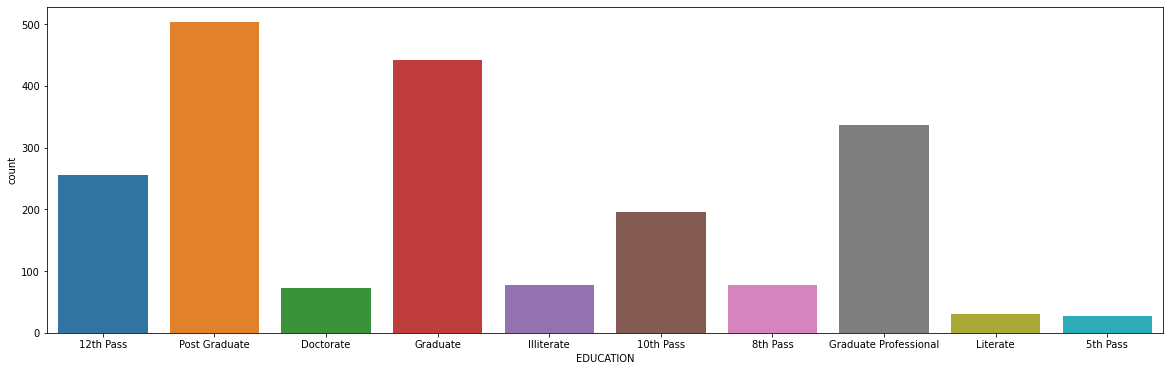

In [20]:
#Using Seaborn's CountPlot with figure size 10 * 6
plt.figure(figsize=(20,6))
sns.countplot(x='EDUCATION',data=df2);

In [21]:
df2['EDUCATION'] = df2['EDUCATION'].replace(['5th Pass','8th Pass'],'Illiterate')
df2['EDUCATION'].value_counts()

Post Graduate            503
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
Illiterate               183
Doctorate                 73
Literate                  30
Name: EDUCATION, dtype: int64

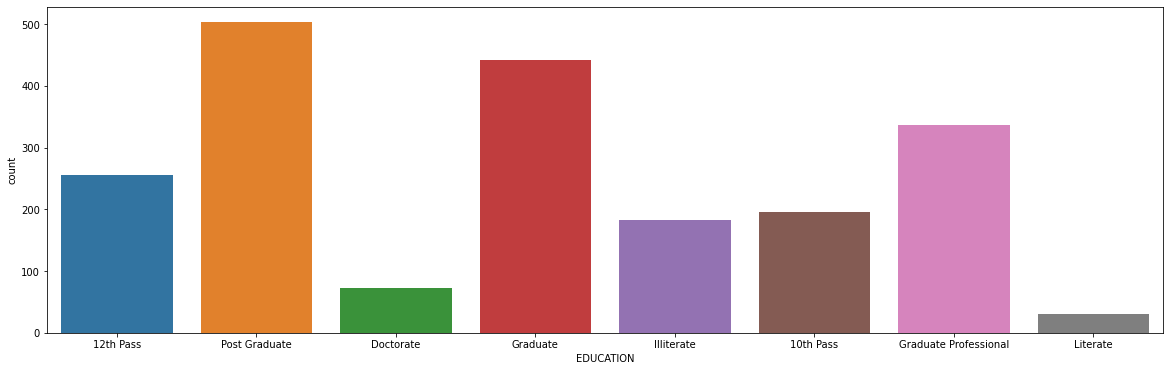

In [22]:
#Using Seaborn's CountPlot with figure size 10 * 6
plt.figure(figsize=(20,6))
sns.countplot(x='EDUCATION',data=df2);

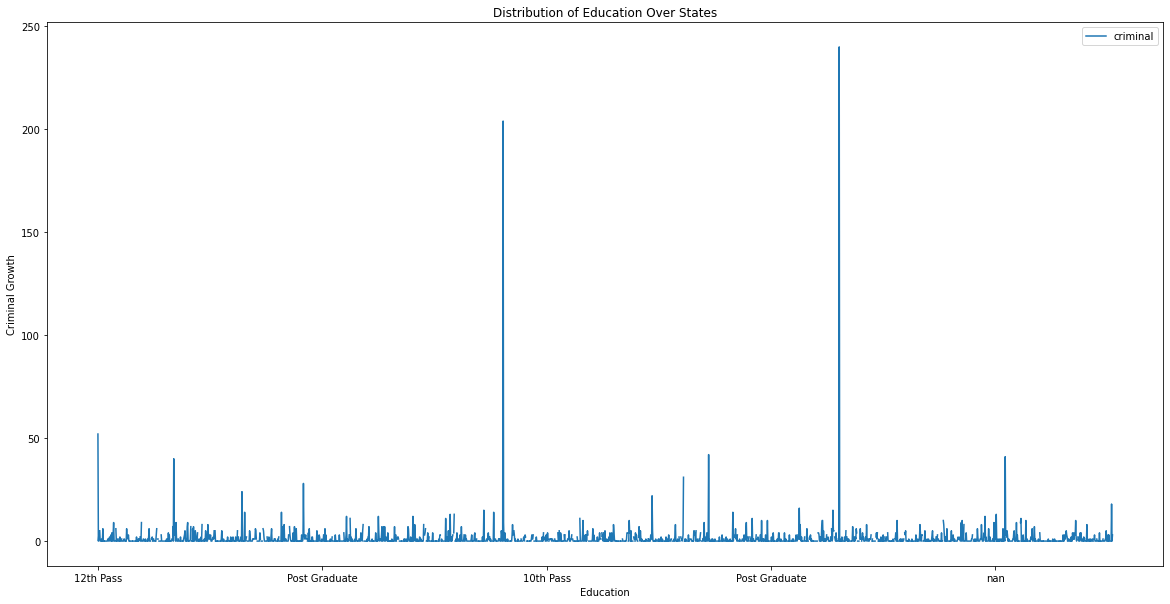

In [23]:
import matplotlib.pyplot as plt
#fig = plt.figure(figsize =(100, 7))
df2.plot(x="EDUCATION", y=["criminal"],figsize =(20, 10), fontsize=10)
plt.xlabel("Education")
plt.ylabel("Criminal Growth")
plt.title("Distribution of Education Over States")
plt.show()

#Education vs Criminal Barplot

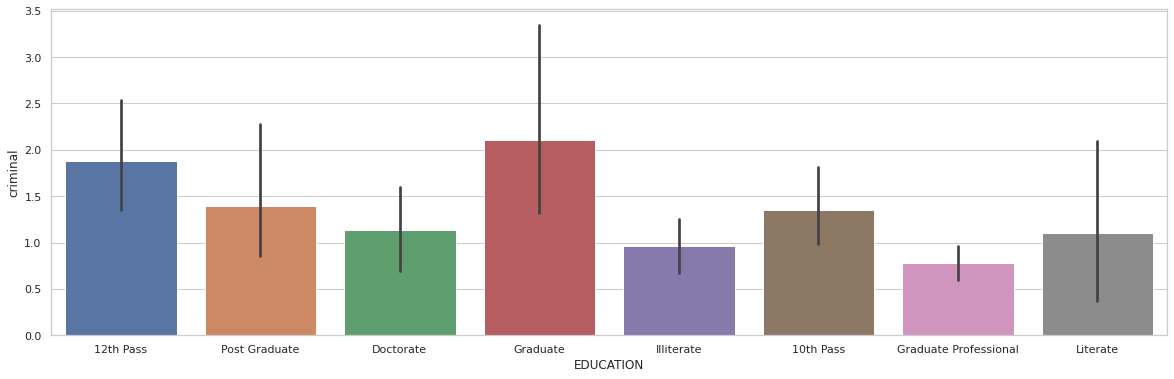

In [24]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,6))
ax = sns.barplot(x="EDUCATION", y="criminal", data=df2)

We can analyze from the graph that Graduate and 12 th Pass criminal candidates are maximum. Specially we want to mention tha that a single graduate person has done 240 crimes.

In [25]:
cn1= int (0)
cn2= int (0)
for i in df2['GENDER']:
  if i=='MALE':
    cn1+=1
  elif i=='FEMALE':
    cn2+=1
print(cn1)
print(cn2)

1760
258


#pie chart of Male vs Female candidates

From the pie chart we can see that the the number of male candidates is greater than the number of female candidates.

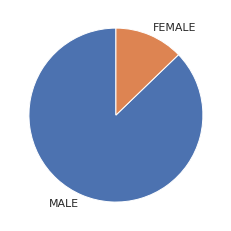

In [26]:
y = np.array([cn1,cn2])
mylabels = ["MALE","FEMALE"]
plt.pie(y, labels = mylabels, startangle = 90)
plt.show() 

## From this pie chart, we can see that the number of male candidates is much greater than the number of female candidates.

#State wise Candidates with Crime Cases
 The number of candidates with crime cases are maximum in Bihar,Kerala,Maharashtra,West Bengal,Uttar Pradesh states. 


In [27]:
state_criminal = df2.groupby('STATE')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['STATE'])

state_criminal_winner = df2[df2['WINNER']>0].groupby('STATE')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['STATE'])
state_criminal

,criminal
STATE,
Andhra Pradesh,81.0
Bihar,312.0
Gujarat,39.0
Jharkhand,67.0
Karnataka,44.0
Kerala,669.0
Madhya Pradesh,63.0
Maharashtra,302.0
Odisha,105.0


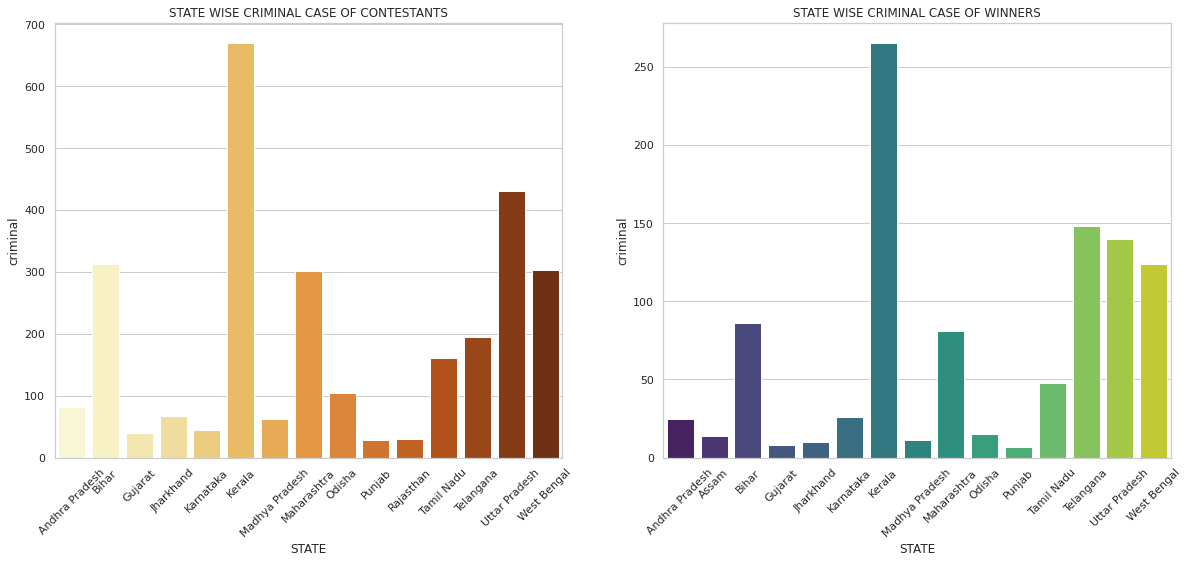

In [28]:
# 2 Barplot Side by Side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Passing X axis and Y axis along with subplot position
sns.barplot(x = state_criminal.index , y = state_criminal['criminal'] , ax=axes[0] , palette='YlOrBr');
axes[0].tick_params(axis='x' , rotation=45); #changing the X axis poition to read more clearly
axes[0].set_title('STATE WISE CRIMINAL CASE OF CONTESTANTS');

#We can also change the color of the barplots by giving different palletes
sns.barplot(x = state_criminal_winner.index , y = state_criminal_winner['criminal'] , ax=axes[1] , palette='viridis');
axes[1].set_title('STATE WISE CRIMINAL CASE OF WINNERS');
plt.xticks(rotation=45);

Here we can see the crime case across the states of candidates and winners. Here the maximum height of bargraph is showing in the state Kerala.

In [29]:
cn1= int (0)
cn2= int (0)
cn3= int (0)
cn4= int (0)
for i in df2['CATEGORY']:
  if i=='SC':
    cn1+=1
  elif i=='ST':
    cn2+=1
  elif i=='GENERAL':
    cn3+=1
  else:
    cn4+=1
print(cn1)
print(cn2)
print(cn3)
print(cn4)

383
243
1392
245


#Barplot of category Growth:
Here we calulating the number of SC,ST and GENERAL candidates in the loksabha election 2019.

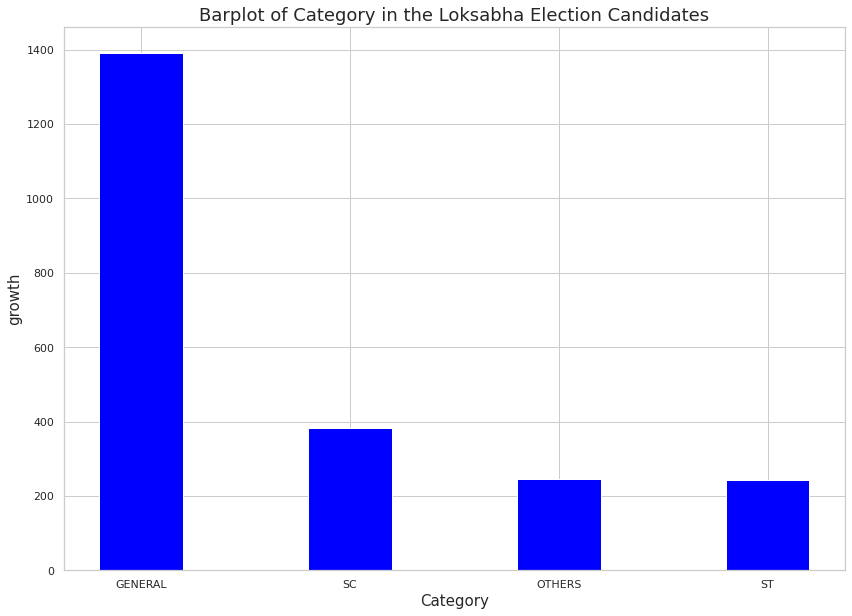

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  
  
# Initialize data
consumption = ['SC','ST','GENERAL','OTHERS']
growth = [cn1,cn2,cn3,cn4]
  

# Create a pandas dataframe
df = pd.DataFrame({"consumption": consumption,
                   "growth": growth})
df_sorted_desc= df.sort_values('growth',ascending=False)
plt.figure(figsize=(14,10))
# make bar plot with matplotlib
plt.bar('consumption', 'growth',data=df_sorted_desc,color ='blue',
        width = 0.4)
plt.xlabel("Category", size=15)
plt.ylabel("growth", size=15)
plt.title("Barplot of Category in the Loksabha Election Candidates", size=18)
plt.savefig("bar_plot_matplotlib_Python.png")
  


From the graph we can see that the number of general cadidates are maximum in India.

In [31]:
df2.PARTY.value_counts()

BJP      420
INC      413
NOTA     245
IND      201
BSP      163
        ... 
PDP        1
AHNP       1
ABSKP      1
VCSMP      1
MNF        1
Name: PARTY, Length: 133, dtype: int64

#Barplot of Candidate Allocation in Loksabha Election 2019
 Here we  are counting the total number of allocation of candidates for different parties in different constituncies in India.

In [32]:
cn1= int (0)
cn2= int (0)
cn3= int (0)
cn4= int (0)
cn5= int (0)
cn6= int (0)
for i in df2['PARTY']:
  if i=='BJP':
    cn1+=1
  elif i=='INC':
    cn2+=1
  elif i=='NOTA':
    cn3+=1
  elif i=='IND':
    cn4+=1
  elif i=='BSP':
    cn5+=1
  else:
    cn6+=1
#cn1+=cn6
print(cn1)
print(cn2)
print(cn3)
print(cn4)
print(cn5)
print(cn6)

420
413
245
201
163
821


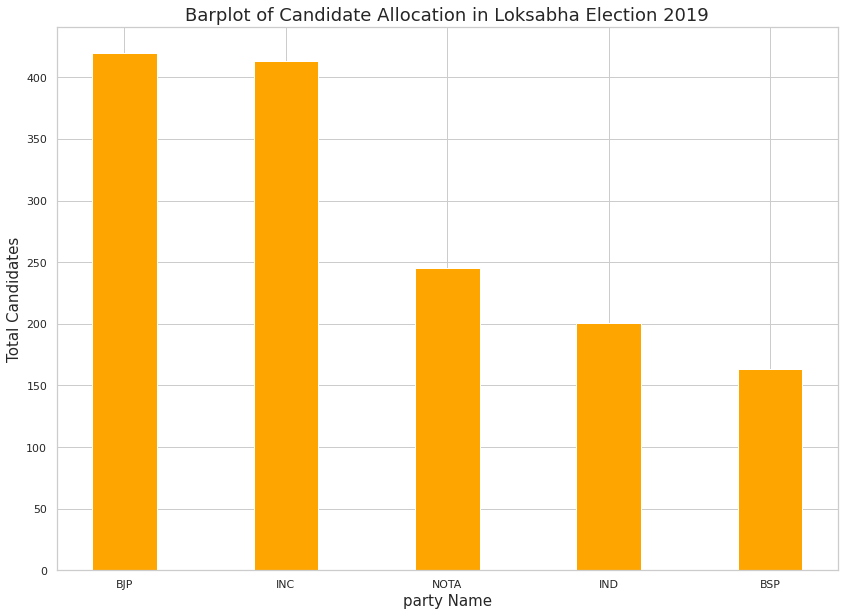

In [33]:
# Initialize data
consumption = ['BJP','INC','NOTA','IND','BSP']
growth = [cn1,cn2,cn3,cn4,cn5]
  

# Create a pandas dataframe
df = pd.DataFrame({"consumption": consumption,
                   "growth": growth})
df_sorted_desc= df.sort_values('growth',ascending=False)
plt.figure(figsize=(14,10))
# make bar plot with matplotlib
plt.bar('consumption', 'growth',data=df_sorted_desc,color ='orange',
        width = 0.4)
plt.xlabel("party Name", size=15)
plt.ylabel("Total Candidates", size=15)
plt.title("Barplot of Candidate Allocation in Loksabha Election 2019", size=18)
plt.savefig("bar_plot_matplotlib_Python.png")
  

Here we can see that the bjp candidates are maximum.

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   criminal                                  2018 non-null   float64
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [35]:
df2['criminal'] = pd.to_numeric(df2['criminal'] , errors='coerce')

#Bar Plot of Party vs Candidates with Crime Case:

Here we are calculating the criminal case candidates in different parties. From that knowledge we can aware of the criminal cases of the different parties.



In [36]:
party_criminal_winner = df2[df2['criminal']>0].groupby('PARTY')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['PARTY'])
party_winner = df2[(df2['criminal']>0) & (df2['WINNER']>0)].groupby('PARTY')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['PARTY'])

party_winner

,criminal
PARTY,
AIMIM,9.0
AITC,17.0
AIUDF,7.0
BJP,403.0
BSP,32.0
DMK,28.0
INC,355.0
IND,6.0
JD(U),31.0


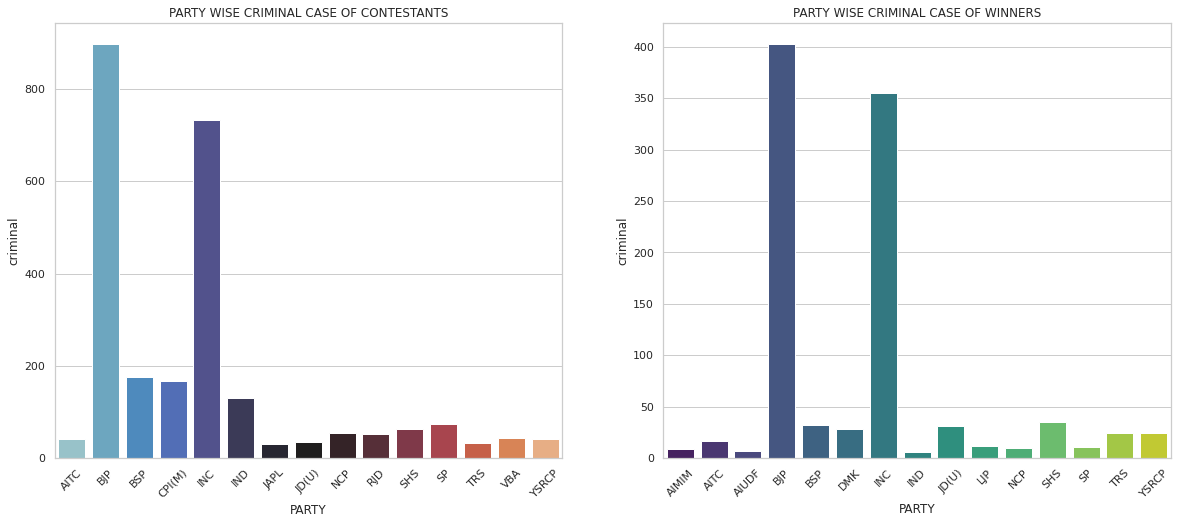

In [37]:
# 2 Barplot Side by Side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Passing X axis and Y axis along with subplot position
sns.barplot(x = party_criminal_winner.index , y = party_criminal_winner['criminal'] , ax=axes[0] , palette='icefire');
axes[0].tick_params(axis='x' , rotation=45); #changing the X axis poition to read more clearly
axes[0].set_title('PARTY WISE CRIMINAL CASE OF CONTESTANTS');

#We can also change the color of the barplots by giving different palletes
sns.barplot(x = party_winner.index , y = party_winner['criminal'] , ax=axes[1] , palette='viridis');
axes[1].set_title('PARTY WISE CRIMINAL CASE OF WINNERS');
plt.xticks(rotation=45);

From the above diagram we can see that the bjp and congress parties have maximum number of criminal cases in India. This is because of that, these two parties are all India based where as most of the other parties are regional parties.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 64800x504 with 0 Axes>

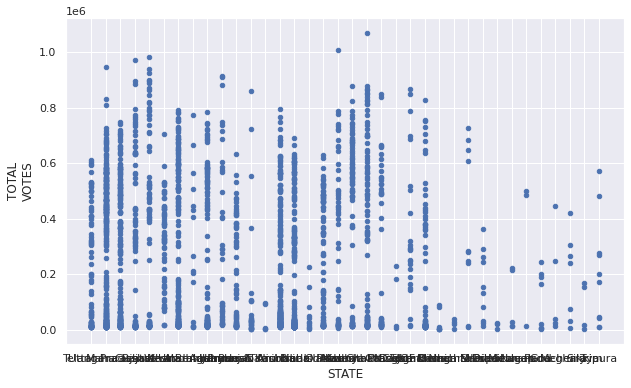

In [72]:
fig = plt.figure(figsize =(900, 7))
df2.plot(x="STATE", y="TOTAL\nVOTES", kind="scatter")

In [39]:
df2.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,criminal,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.0,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [40]:
age_criminal = df2[df2['criminal']>0].groupby('AGE')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['AGE'])
age_criminal


,criminal
AGE,
37.0,228.0
42.0,68.0
46.0,70.0
48.0,114.0
49.0,335.0
50.0,83.0
51.0,159.0
52.0,143.0
54.0,104.0


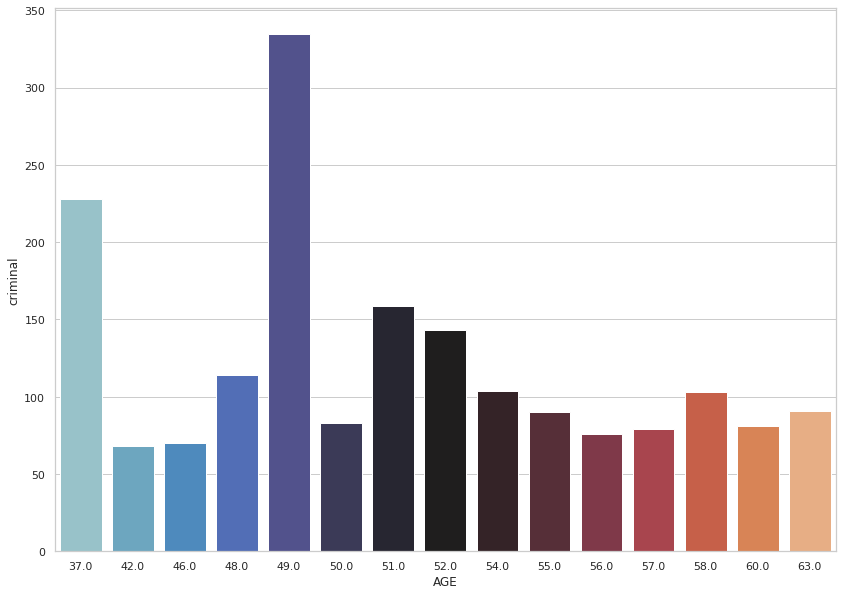

In [41]:
# 2 Barplot Side by Side
#fig, axes = plt.subplots(1, 2, figsize=(20, 8))
plt.figure(figsize=(14,10))
# Passing X axis and Y axis along with subplot position
sns.barplot(x = age_criminal.index , y = age_criminal['criminal'] , palette='icefire');
#axes[0].tick_params(axis='x' , rotation=45); #changing the X axis poition to read more clearly
#axes[0].set_title('AGE WISE CRIMINAL CASE OF CONTESTANTS');

In [42]:
total_voter1 = df2[df2['TOTAL\nVOTES']>0].groupby('STATE')[['TOTAL\nVOTES']].sum().sort_values(by=
                        ['TOTAL\nVOTES']).tail(15).sort_values(by=['STATE'])

total_voter1

,TOTAL\nVOTES
STATE,
Andhra Pradesh,30968703
Assam,17441534
Bihar,38755595
Gujarat,28158684
Jharkhand,14253127
Karnataka,33859226
Kerala,20010727
Madhya Pradesh,35580595
Maharashtra,52287234


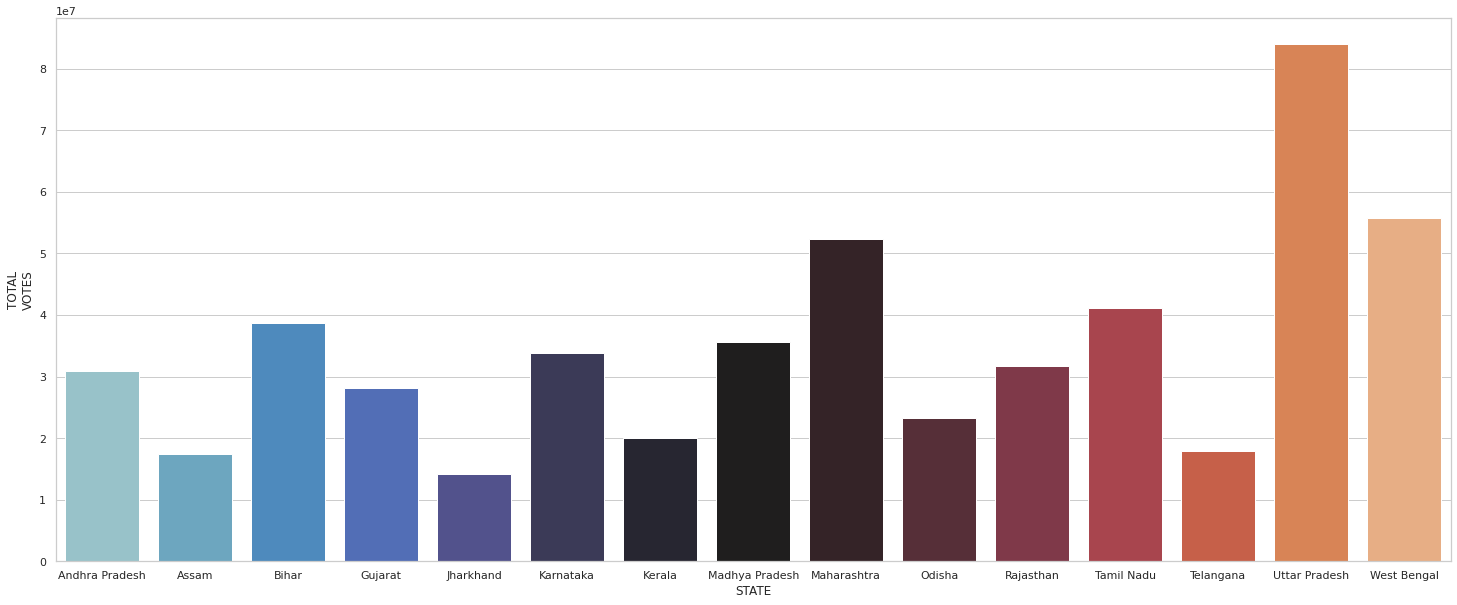

In [43]:
# 2 Barplot Side by Side
#fig, axes = plt.subplots(1, 2, figsize=(20, 8))
plt.figure(figsize=(25,10))
# Passing X axis and Y axis along with subplot position
sns.barplot(x = total_voter1.index , y = total_voter1['TOTAL\nVOTES'] , palette='icefire');
#axes[0].tick_params(axis='x' , rotation=45); #changing the X axis poition to read more clearly
#axes[0].set_title('AGE WISE CRIMINAL CASE OF CONTESTANTS');

## From the graph, we can notice that the criminal cases history is maximum at the age of 49,37, and 51.

In [44]:
fm = df2.groupby(['GENDER','WINNER'])[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['GENDER'])

fm

criminal
GENDER WINNER          
FEMALE 1           65.0
       0          171.0
MALE   1          964.0
       0         1734.0

In [45]:
party_winner1 = df2[(df2['criminal']>0) & (df2['WINNER']>0)].groupby('GENDER')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['GENDER'])
party_winner1

,criminal
GENDER,
FEMALE,65.0
MALE,964.0


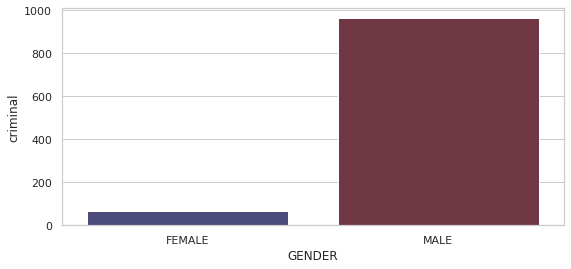

In [46]:
# 2 Barplot Side by Side
#fig, axes = plt.subplots(1, 2, figsize=(20, 8))
plt.figure(figsize=(9,4))
# Passing X axis and Y axis along with subplot position
sns.barplot(x = party_winner1.index , y = party_winner1['criminal']  , palette='icefire');
#axes[0].tick_params(axis='x' , rotation=45); #changing the X axis poition to read more clearly
#axes[0].set_title('AGE WISE CRIMINAL CASE OF CONTESTANTS');

## This is the bar plot of gender vs Crime from which we can know that the number of female candidates is maximum or the number of male candidates is maximum in India.

In [47]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [49]:
fig = px.scatter(df2, 
                 x='AGE', 
                 y='criminal', 
                 color='WINNER', 
                 opacity=0.8, 
                 hover_data=['GENDER','CATEGORY','STATE','PARTY','NAME','EDUCATION'], 
                 title='Age vs Crime vs Winner vs Gender vs Category vs State vs Party vs Education')
fig.update_traces(marker_size=5)
fig.show()

In [50]:
df=df2[df2.EDUCATION=='Doctorate']
df.shape


(73, 19)

In [51]:
df=df[df.WINNER==1]
df.shape

(23, 19)

In [52]:
df1=df[(df.PARTY=='BJP') & (df.WINNER==1)]
df1.shape

(14, 19)

In [53]:
pip install plotly

In [54]:
Female_winners = df2[(df2['WINNER']==1) & (df2['GENDER']=='FEMALE')]
ax = px.histogram(Female_winners, 'STATE', title = 'Female Winners from different States',width=1150,height=700)
ax.show()

In [55]:
fig = px.violin(df2, 
                 x='AGE', 
                 y='criminal', 
                 color='WINNER', 
                 
                 hover_data=['GENDER','CATEGORY','STATE','PARTY','NAME','EDUCATION'], 
                 title='Age vs Crime vs Winner vs Gender vs Category vs State vs Party vs Education')
fig.update_traces(marker_size=5)
fig.show()

In [56]:
fig = px.scatter(df2, 
                 x="AGE", 
                 y="EDUCATION", 
                 animation_frame="STATE", 
                 animation_group="PARTY",
#                  size="pop",     
                 color="PARTY", 
                 hover_name="CONSTITUENCY",
                 log_x=True, 
                 size_max=80, 
                 range_x=[20,90], 
                 range_y=[0,7])

fig.show()

In [57]:
df2.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,criminal,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.0,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [58]:
import io
hp = pd.read_csv('Votes 2019.csv')


In [59]:
hp.head()

,State Name,Total Electors,Total Actual Votes,Male,Female,Other,Total Voters,EVM Vote,Postal Vote,Migrant Vote
0,Andaman & Nicobar Islands,317878,207296,109407,97671,2,207080,207080,216,0
1,Andhra Pradesh*,39345717,31607242,15567765,15818150,709,31386624,31380829,226413,0
2,Arunachal Pradesh,798249,652091,300798,326179,0,626977,626977,25114,0
3,Assam,21991112,17986066,9184449,8748413,23,17932885,17932885,53181,0
4,Bihar,71063555,40805297,20688548,19978743,53,40667344,40667344,137953,0


In [60]:
hp.describe()

,Total Electors,Total Actual Votes,Male,Female,Other,Total Voters,EVM Vote,Postal Vote,Migrant Vote
count,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,36.000000,3.600000e+01,3.600000e+01,36.000000,36.000000
mean,2.528192e+07,1.703158e+07,8.799805e+06,8.167650e+06,157.305556,1.696761e+07,1.696740e+07,63807.222222,376.027778
std,3.206094e+07,2.051908e+07,1.076487e+07,9.708802e+06,248.858746,2.045418e+07,2.045404e+07,74730.835112,2256.166667
min,5.505700e+04,4.700900e+04,2.330100e+04,2.357600e+04,0.000000,4.687700e+04,4.687700e+04,28.000000,0.000000
25%,1.095148e+06,8.375922e+05,3.999400e+05,4.360435e+05,1.500000,8.360012e+05,8.360012e+05,3871.500000,0.000000
50%,1.613374e+07,1.068027e+07,5.807684e+06,4.838032e+06,42.000000,1.064581e+07,1.064581e+07,41079.500000,0.000000
75%,4.079071e+07,2.971328e+07,1.560510e+07,1.374426e+07,209.500000,2.954529e+07,2.954280e+07,76956.500000,0.000000
max,1.458590e+08,8.648140e+07,4.627993e+07,3.994037e+07,1113.000000,8.622064e+07,8.622064e+07,260753.000000,13537.000000


In [61]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State Name          36 non-null     object
 1   Total Electors      36 non-null     int64 
 2   Total Actual Votes  36 non-null     int64 
 3   Male                36 non-null     int64 
 4   Female              36 non-null     int64 
 5   Other               36 non-null     int64 
 6   Total Voters        36 non-null     int64 
 7   EVM Vote            36 non-null     int64 
 8   Postal Vote         36 non-null     int64 
 9   Migrant Vote        36 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 2.9+ KB


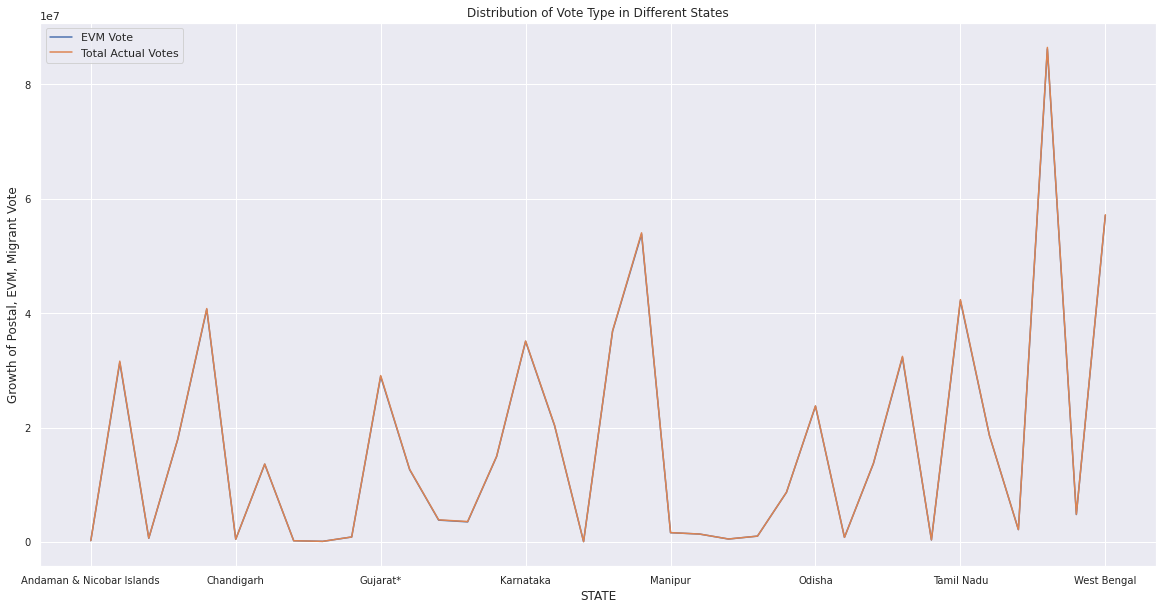

In [62]:
#EVM Vote	Postal Vote	Migrant Vote
import matplotlib.pyplot as plt
#fig = plt.figure(figsize =(100, 7))
hp.plot(x="State Name", y=["EVM Vote","Total Actual Votes"],figsize =(20, 10), fontsize=10)
plt.xlabel("STATE")
plt.ylabel("Growth of Postal, EVM, Migrant Vote")
plt.title("Distribution of Vote Type in Different States")
plt.show()

## Line Graph of State vs Total EVM Vote & Total Actual Vote:

In [63]:
hp['ratio']=hp['Total Actual Votes'].div(hp['Total Electors'])

In [64]:
hp.head()

,State Name,Total Electors,Total Actual Votes,Male,Female,Other,Total Voters,EVM Vote,Postal Vote,Migrant Vote,ratio
0,Andaman & Nicobar Islands,317878,207296,109407,97671,2,207080,207080,216,0,0.652124
1,Andhra Pradesh*,39345717,31607242,15567765,15818150,709,31386624,31380829,226413,0,0.803321
2,Arunachal Pradesh,798249,652091,300798,326179,0,626977,626977,25114,0,0.816902
3,Assam,21991112,17986066,9184449,8748413,23,17932885,17932885,53181,0,0.817879
4,Bihar,71063555,40805297,20688548,19978743,53,40667344,40667344,137953,0,0.574208


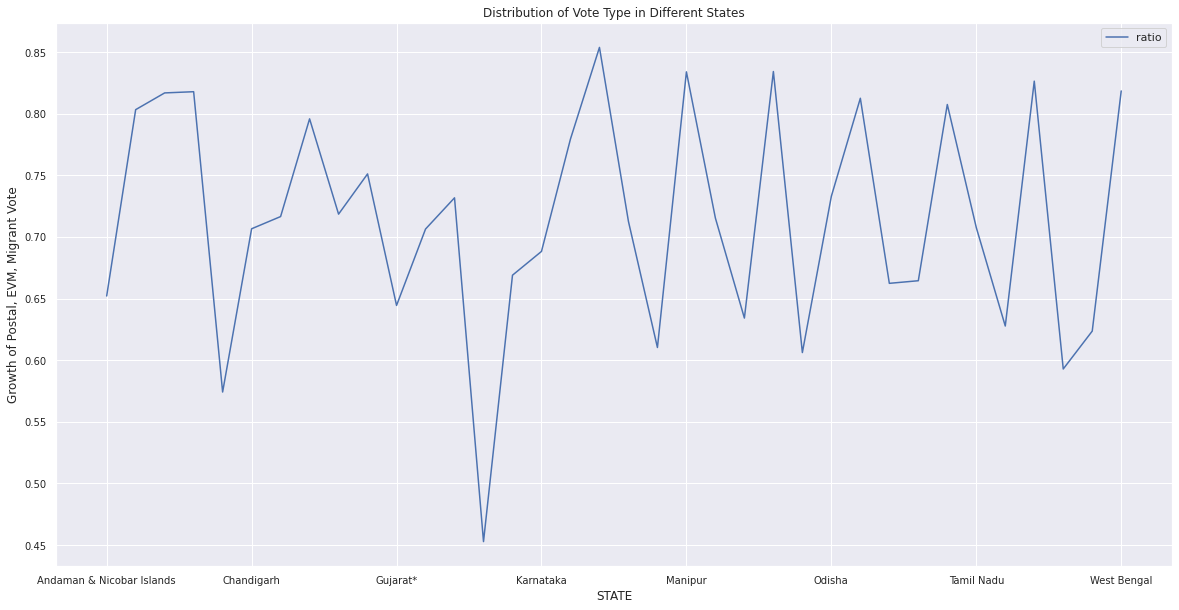

In [65]:
#EVM Vote	Postal Vote	Migrant Vote
import matplotlib.pyplot as plt
#fig = plt.figure(figsize =(100, 7))
hp.plot(x="State Name", y=["ratio"],figsize =(20, 10), fontsize=10)
plt.xlabel("STATE")
plt.ylabel("Growth of Postal, EVM, Migrant Vote")
plt.title("Distribution of Vote Type in Different States")
plt.show()

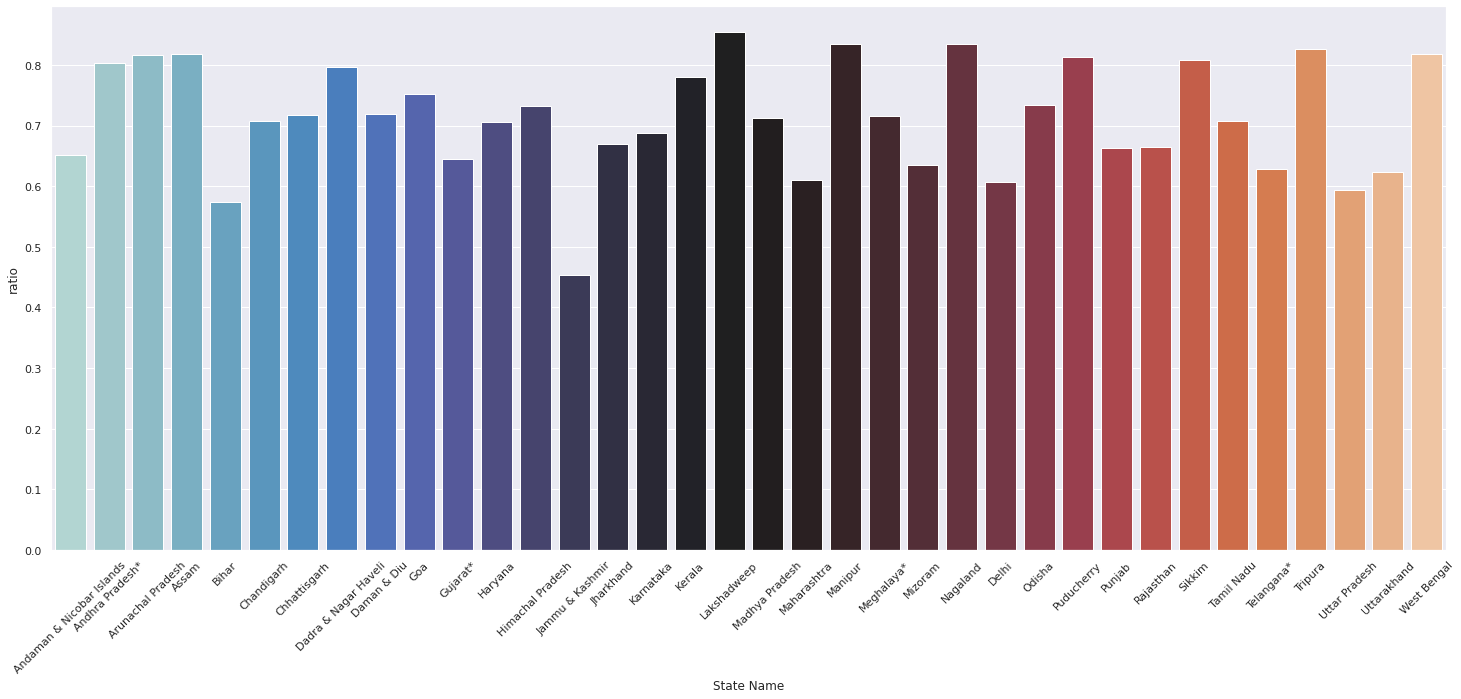

In [66]:
# 2 Barplot Side by Side
#fig, axes = plt.subplots(1, 2, figsize=(20, 8))
plt.figure(figsize=(25,10))
# Passing X axis and Y axis along with subplot position
plt.xticks(rotation=45)
sns.barplot(x = hp['State Name'] , y = hp['ratio'] , palette='icefire');
#axes[0].tick_params(axis='x' , rotation=45); #changing the X axis poition to read more clearly
#axes[0].set_title('AGE WISE CRIMINAL CASE OF CONTESTANTS');

## This the barplot of vote percentage in different states in Lok Sabha 2019.

In [67]:
import io
hf = pd.read_csv('2019_Results_Winning_Candidate.csv')

In [68]:
hf.head()

,State,Constituency,Votes,Percentage,Party,Candidate
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,95308,45.98,Indian National Congress,KULDEEP RAI SHARMA
1,Andhra Pradesh,Amalapuram,485313,39.43,Yuvajana Sramika Rythu Congress Party,CHINTA ANURADHA
2,Andhra Pradesh,Anakapalli,586226,47.33,Yuvajana Sramika Rythu Congress Party,Dr.Beesetti Venkata Satyavathi
3,Andhra Pradesh,Anantapur,695208,51.79,Yuvajana Sramika Rythu Congress Party,TALARI RANGAIAH
4,Andhra Pradesh,Aruku,562190,52.32,Yuvajana Sramika Rythu Congress Party,GODDETI. MADHAVI


In [69]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         542 non-null    object 
 1   Constituency  542 non-null    object 
 2   Votes         542 non-null    int64  
 3   Percentage    542 non-null    float64
 4   Party         542 non-null    object 
 5   Candidate     542 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 25.5+ KB


In [88]:
total_voter2 = hf.sort_values(by='Percentage', ascending=False).nlargest(15, 'Percentage')
total_voter2

,State,Constituency,Votes,Percentage,Party,Candidate
120,Gujarat,Surat,795651,74.47,Bharatiya Janata Party,Darshana Vikram Jardosh
114,Gujarat,Navsari,972739,74.37,Bharatiya Janata Party,C. R. Patil
122,Gujarat,Vadodara,883719,72.30,Bharatiya Janata Party,RANJANBEN BHATT
135,Himachal Pradesh,Kangra,725218,72.02,Bharatiya Janata Party,Kishan Kapoor
337,Rajasthan,Bhilwara,938160,71.59,Bharatiya Janata Party,SUBHASH CHANDRA BAHERIA
258,Maharashtra,Mumbai North,706678,71.40,Bharatiya Janata Party,Gopal Shetty
129,Haryana,Karnal,911594,70.08,Bharatiya Janata Party,Sanjay Bhatia
108,Gujarat,Gandhinagar,894624,69.67,Bharatiya Janata Party,AMIT SHAH
353,Rajasthan,Rajsamand,863039,69.61,Bharatiya Janata Party,Diya Kumari
217,Madhya Pradesh,HOSHANGABAD,877927,69.35,Bharatiya Janata Party,UDAY PRATAP SINGH


In [100]:
ax = px.bar(total_voter2, x='Candidate', y='Percentage',hover_data=['State'] ,title = 'Top 15 Vote Percentages Of Candidates',width=1050,height=700)
ax.show()